# Inaugural Project

Imports and set magics:

In [59]:
# a. we import the required packeges 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# b. autoreload modules when code is run. Otherwise, python will not see recent changes. 
%load_ext autoreload
%autoreload 2

# c. we import your own code
import inauguralproject as HSM

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Question 1

We use the class to find how $\frac{H_F}{H_M}$ changes when varying $\alpha$ $\in$ {0.25, 0.50, 0.75} and $\sigma =$ {0.5, 1.0, 1.5}

In [60]:
# a. we define the model 
model = HSM.HouseholdSpecializationModelClass()

# b. we define alpha and sigma 
alpha_vector = [0.25,0.5,0.75]
sigma_vector = [0.5, 1, 1.5]

# c. we create a dataframe where the alphas are the columns and sigmas are the indexes/rows 
df = pd.DataFrame(columns= alpha_vector, index= sigma_vector)

# d. for every alpha we loop over every sigma and use the 'solve_discrete' to extract HF and HM
for i in alpha_vector:
    for j in sigma_vector:
        # i. we add alpha_i to model 
        model.par.alpha = i
        # ii. we add sigma_j to model 
        model.par.sigma = j
        # iii. we solve the model 
        results = model.solve_discrete()
        # iv. we find the ratio 
        ratio = results.HF/results.HM
        # v. we add the ratio to the dataframe 
        df.loc[j,i] = ratio.round(4)

# e. we adjust and print the dataframe 
columns = pd.MultiIndex.from_tuples([('alpha', alpha_vector[0]), (' ', alpha_vector[1]), ('', alpha_vector[2])])
df.columns = columns
rows = pd.MultiIndex.from_tuples([('sigma', sigma_vector[0]), (' ', sigma_vector[1]), ('', sigma_vector[2])])
df.index = rows
print(f'HF over HM changes for varying alpha and sigma')
df

/Users/juliekrabek/Library/Mobile Documents/com~apple~CloudDocs/Uni/2 - KU/2. semester/Introduction to Programming/projects-2023-cbjk/inauguralproject/inauguralproject.py:68: RuntimeWarning: divide by zero encountered in reciprocal
  H = ((1-par.alpha)*HM**((par.sigma-1)/par.sigma)+par.alpha*HF**((par.sigma-1)/par.sigma))**(par.sigma/(par.sigma-1))
/Users/juliekrabek/Library/Mobile Documents/com~apple~CloudDocs/Uni/2 - KU/2. semester/Introduction to Programming/projects-2023-cbjk/inauguralproject/inauguralproject.py:68: RuntimeWarning: invalid value encountered in reciprocal
  H = ((1-par.alpha)*HM**((par.sigma-1)/par.sigma)+par.alpha*HF**((par.sigma-1)/par.sigma))**(par.sigma/(par.sigma-1))
/Users/juliekrabek/Library/Mobile Documents/com~apple~CloudDocs/Uni/2 - KU/2. semester/Introduction to Programming/projects-2023-cbjk/inauguralproject/inauguralproject.py:73: RuntimeWarning: invalid value encountered in reciprocal
  utility = np.fmax(Q,1e-8)**(1-par.rho)/(1-par.rho)


HF over HM changes for varying alpha and sigma


,,alpha,,
,,0.25,0.50,0.75
sigma,0.5,0.5455,1.0,1.8333
,1.0,0.3077,1.0,3.25
,1.5,0.2143,1.0,4.6667


From the above table it is seen that, as women's productivity in home production relative to men's increases, as $\alpha$ increases, then women's hours working at home relative to men's increases. 

Further, as the elasticity increases then the hours worked at home become more elastic hence substitution increases. So, when women are less productive than men, $\alpha = 0.25$, then the $\frac{H_F}{H_M}$ decreases. The oppisite is the case when women are more productive. When they are equally productive, the elasticity has no effect. 

## Question 2

We plot the $log \space \frac{H_F}{H_M}$ against $log \space \frac{\omega_F}{\omega_M}$ for $\omega_F$ $\in [0.8, 0.9, 1.0, 1.1, 1.2]$. 

In [61]:
# a. we initialize alpha and sigma 
model.par.alpha = 0.5
model.par.sigma = 1

# b. empty lists to contain the log H and w 
logratioH = []
logratiow = []

# c. we loop over every wF, solve the model and adds the result to the empty lists 
for i in model.par.wF_vec:
    # i. we set the wF = i
    model.par.wF = i
    # ii. we use 'solve_discrete' from the class to find the results and store en 'results'
    results = model.solve_discrete()
    # iii. append the log(HF/HM) til the list 'logratioH' 
    logratioH.append(np.log(results.HF/results.HM))
    # iv. append the log(wF/wM) til the list 'logratiow' 
    logratiow.append(np.log(i/model.par.wM))

# d. we construct a dataframe to contain H and w log ratios for every wF
plot_df = pd.DataFrame({"wf": model.par.wF_vec, "H ratio": np.round(logratioH, 4), "w ratio": np.round(logratiow, 4)})
plot_df

/Users/juliekrabek/Library/Mobile Documents/com~apple~CloudDocs/Uni/2 - KU/2. semester/Introduction to Programming/projects-2023-cbjk/inauguralproject/inauguralproject.py:73: RuntimeWarning: invalid value encountered in reciprocal
  utility = np.fmax(Q,1e-8)**(1-par.rho)/(1-par.rho)


,wf,H ratio,w ratio
0,0.8,0.2231,-0.2231
1,0.9,0.0000,-0.1054
2,1.0,0.0000,0.0000
3,1.1,-0.1178,0.0953
4,1.2,-0.2231,0.1823


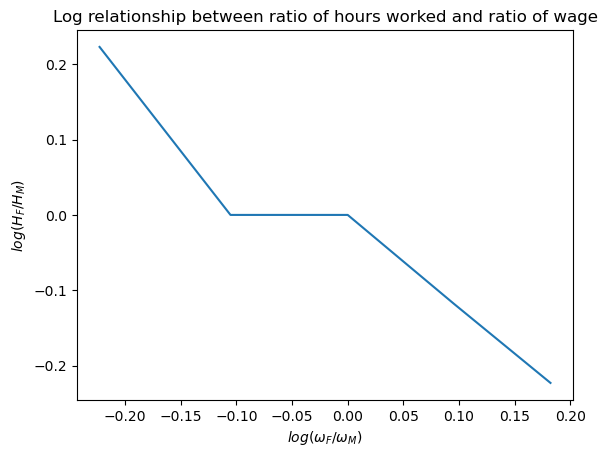

In [62]:
# e. we illustrate the relationship between 'logratioH' and 'logratiow' for given wF using the 'plot_illustration' function
model.plot_illustration(plot_df)

From the above figure we see that as women's wages increases relative to men, then women's share of hours working at home decreases. But when wages of women are 0.9 and 1.0, then the relative hours worked at home are the same. 

## Question 3

We plot the $log \space \frac{H_F}{H_M}$ against $log \space \frac{\omega_F}{\omega_M}$ for $\omega_F$ $\in [0.8, 0.9, 1.0, 1.1, 1.2]$ again, but this time the choise set is continuous, so $L_M, L_F, H_M, H_F \in [0,24]$. 

In [63]:
# a. we construct empty lists to contain the log(HF/HM) and log(wF/wM) 
logratioHc=[]
logratiowc=[]

# b. we loop over every wF, solve the model and adds the result to the empty lists 
for i in model.par.wF_vec:
    # i. we set the wF = i
    model.par.wF = i
    # ii. we use 'solve' from the class to find the results and store en 'resultsc'
    resultsc =model.solve()
    # iii. append the log(HF/HM) til the list 'logratioHc' 
    logratioHc.append(np.log(resultsc.HF/resultsc.HM))
    # iv. append the log(wF/wM) til the list 'logratiowc' 
    logratiowc.append(np.log(i/model.par.wM))

# c. we construct a dataframe to contain H and w log ratios for every wF
plot_dfc = pd.DataFrame({"wf": model.par.wF_vec, "H ratio": np.round(logratioHc, 4), "w ratio": np.round(logratiowc, 4)})
plot_dfc

,wf,H ratio,w ratio
0,0.8,0.1303,-0.2231
1,0.9,0.0002,-0.1054
2,1.0,0.0000,0.0000
3,1.1,-0.0001,0.0953
4,1.2,-0.1034,0.1823


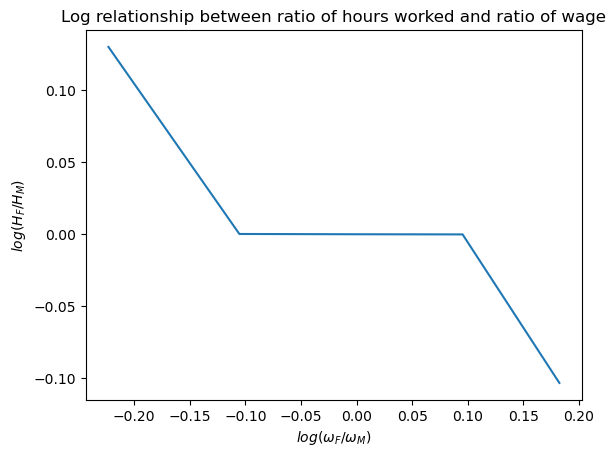

In [64]:
# d. we illustrate the relationship between 'logratioH' and 'logratiow' for given wF using the 'plot_illustration' function
model.plot_illustration(plot_dfc)

From the above figure we see that ... 

## Question 4

We choose $\alpha$ and $\sigma$ such that it minimizes $(\beta_0 - \hat{\beta}_0)^2 + (\beta_1 - \hat{\beta}_1)^2$. To illustrate, we plot the $log \space \frac{H_F}{H_M}$ against $log \space \frac{\omega_F}{\omega_M}$ for $\omega_F$ $\in [0.8, 0.9, 1.0, 1.1, 1.2]$. By default, we use the continuous values for $L_M, L_F, H_M$ and $H_F$.

Text(0, 0.5, '$log(H_F/H_M)$')

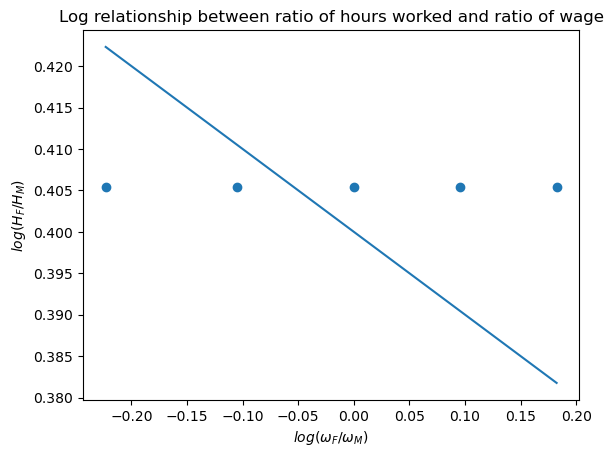

In [71]:
# a. we use the 'estimate' function to estimate the optimal alpha and sigma 
model.estimate()

# b. we find the log H ratio 
log_H_ratio = np.log(model.sol.HF_vec/model.sol.HM_vec)

# c. we construct a figure to illustrate the relationship between log H ratio and log w ratio 
fig4 = plt.figure()
ax = fig4.add_subplot(1,1,1)
# d. we add the 'log_H_ratio' and the weights as scatterplot 
ax.scatter(np.log(model.par.wF_vec),log_H_ratio)
# e. we add the regression from the model 
ax.plot(np.log(model.par.wF_vec),model.par.beta0_target+model.par.beta1_target*np.log(model.par.wF_vec))
# f. we set title and axis labels 
ax.set_title('Log relationship between ratio of hours worked and ratio of wage')
ax.set_xlabel('$log(\omega_F/\omega_M)$')
ax.set_ylabel('$log(H_F/H_M)$')

From the above figure it is seen that ...

## Question 5

We assume that $\alpha = 0.5$ and estimate the model

In [66]:
model.estimate(alpha=0.5)
print('When alpha = 0.5 then beta0 and beta1 are:')
print(f'beta0 = {model.sol.beta0}')
print(f'beta1 = {model.sol.beta1}')

When alpha = 0.5 then beta0 and beta1 are:
beta0 = 0.00033402628501766427
beta1 = -0.10244705698908857


We extend the model to contain children which constaint the hours worked at home. 

We assume that when having children women's home production is 1.5 times men's given that we assume a more conservative sight upon family life. 

In order to implement the above, we implement constraints depending on having children. 

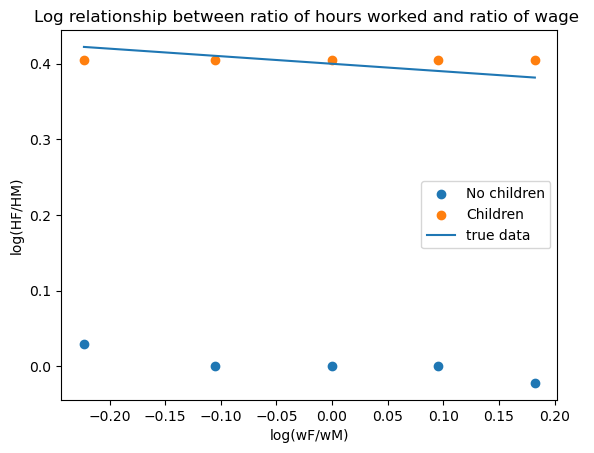

In [76]:
# a. list of number of children 
children = [0,1]

# b. empty list for HF and HM in the following loop 
children_HF_vec= []
children_HM_vec= []
no_HF_vec = []
no_HM_vec = []

# c. we loop over the number of children and use different constraints 
for i in children:
    # i. empty constraints list 
    model.par.constraints = []
    # ii. if no children 
    if i == 0:
        # o. no home production constraint 
        model.par.constraints = ({'type': 'ineq', 'fun': lambda x: 24 - (x[0]+x[1])},{'type': 'ineq', 'fun': lambda x: 24 - (x[2]+x[3])})
        # oo. we estimate the model 
        model.estimate(alpha=0.5)
        # ooo. we add the HF from the model estimation to 'no_HF_vec' 
        no_HF_vec.extend(model.sol.HF_vec)
        # oooo. we add the HM from the model estimation to 'no_HM_vec' 
        no_HM_vec.extend(model.sol.HM_vec)
    # iii. if children   
    else:
        # o. women's home production is 1.5 times men's
        model.par.constraints = ({'type': 'ineq', 'fun': lambda x: 24 - (x[0]+x[1])},{'type': 'ineq', 'fun': lambda x: 24 - (x[2]+x[3])},{'type': 'ineq', 'fun': lambda x: (x[3]-1.5*x[1])})
        # oo. we estimate the model 
        model.estimate(alpha=0.5)
        # ooo. we add the HF from the model estimation to 'children_HF_vec' 
        children_HF_vec.extend(model.sol.HF_vec)
        # oooo. we add the HM from the model estimation to 'children_HM_vec'
        children_HM_vec.extend(model.sol.HM_vec)

# d. we make the H vectors arrays 
children_HF_vec= np.array(children_HF_vec)
children_HM_vec= np.array(children_HM_vec)
no_HF_vec = np.array(no_HF_vec)
no_HM_vec = np.array(no_HM_vec)

# f. we make the log(wF/wM) and log(HF/HM)
x = np.log(model.par.wF_vec)
children_ratio = np.log(children_HF_vec/children_HM_vec)
no_children_ratio = np.log(no_HF_vec/no_HM_vec)

# g. we make regression for each statement for children 
A = np.vstack([np.ones(x.size),x]).T
c_beta0,c_beta1 = np.linalg.lstsq(A,children_ratio,rcond=None)[0]
A = np.vstack([np.ones(x.size),x]).T
nc_beta0,nc_beta1 = np.linalg.lstsq(A,no_children_ratio,rcond=None)[0]

# h. we make the figure and plot 
fig_children = plt.figure()
ax = fig_children.add_subplot(1,1,1)
ax.scatter(np.log(model.par.wF_vec),no_children_ratio, label= "No children")
ax.scatter(np.log(model.par.wF_vec),children_ratio,label= "Children")

ax.plot(np.log(model.par.wF_vec),model.par.beta0_target+model.par.beta1_target*np.log(model.par.wF_vec), label = "true data")
ax.set_title('Log relationship between ratio of hours worked and ratio of wage ')
ax.set_xlabel('log(wF/wM)')
ax.set_ylabel('log(HF/HM)');
ax.legend()

The above figure shows that our extention match the 'true' data well. But let us look into the $\beta$ values. 

In [79]:
print('When children then beta0 and beta1 are:')
print(f'beta0 = {c_beta0}')
print(f'beta1 = {c_beta1}\n')

model.estimate(alpha=0.5)
print('When no children then beta0 and beta1 are:')
print(f'beta0 = {nc_beta0}')
print(f'beta1 = {nc_beta1}')

When children then beta0 and beta1 are:
beta0 = 0.4054651081081645
beta1 = 3.7858645837020913e-16

When no children then beta0 and beta1 are:
beta0 = 0.00033402628501766427
beta1 = -0.10244705698908857


From the above $\beta's$, we see that when women have a home production 1.5 times men's then we have a simiular interaction terms to the 'true' data, but the slope is more flat. While for the situation with no children, equivalent to just $\alpha = 0.5$, has a simiular slope, but the interaction term is way lower. 

